<a href="https://colab.research.google.com/github/idkanythingbro/MachineLearning/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [4]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
inertia = []
K_range = range(1, 11)

In [7]:
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

In [8]:
inertia

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

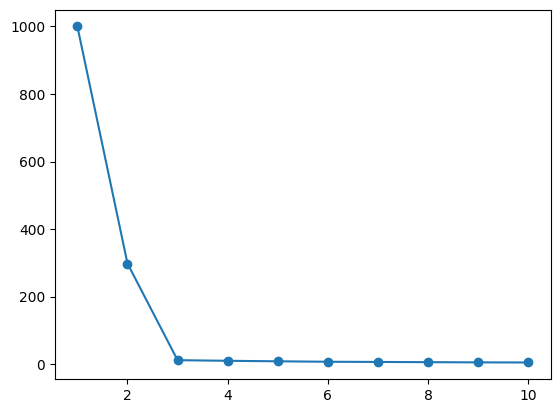

In [9]:
plt.plot(K_range, inertia, marker='o')

In [10]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [11]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [12]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

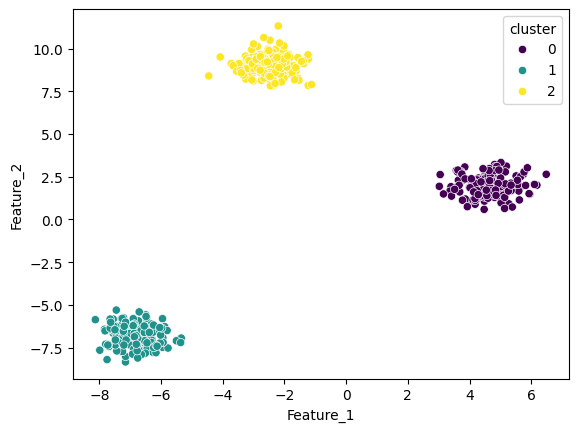

In [13]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')